In [1]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



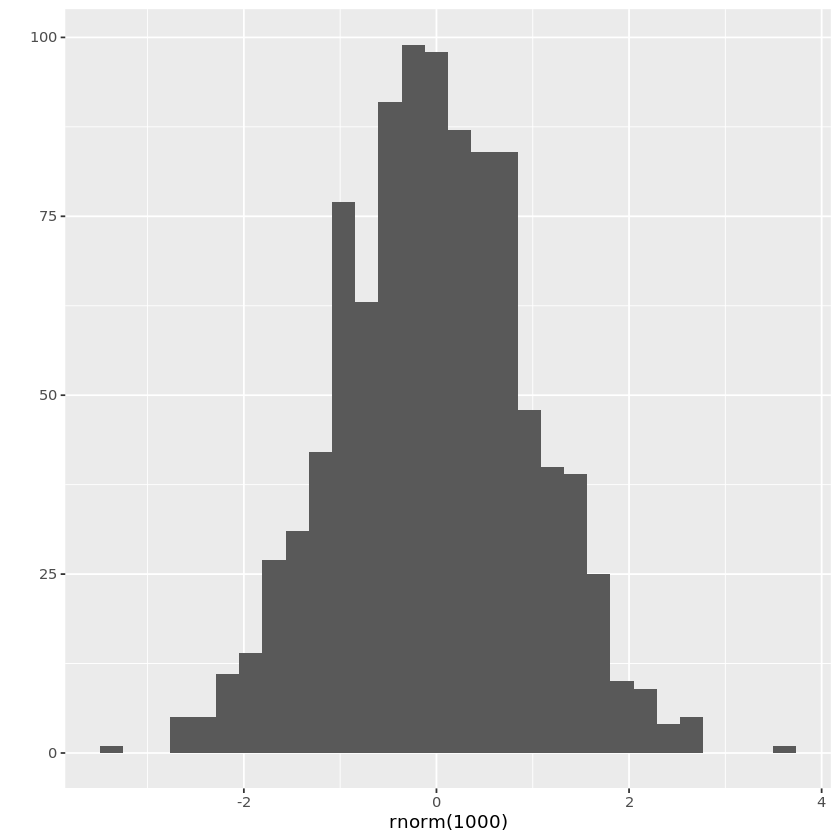

In [2]:
qplot(rnorm(1000))

# Import data from the project
In a console I ran `dx download dbVar_NR_SVs/GRCh38.nr_deletions.bed.gz` to download a file locally.

In [4]:
dels = read.table('GRCh38.nr_deletions.bed.gz', as.is=TRUE)
head(dels)

,V1,V2,V3,V4
,<chr>,<int>,<int>,<chr>
1,chr1,10000,1535693,chr1_10000_1535693_del
2,chr1,10000,2368561,chr1_10000_2368561_del
3,chr1,10000,2777471,chr1_10000_2777471_del
4,chr1,10000,2940953,chr1_10000_2940953_del
5,chr1,10000,3792349,chr1_10000_3792349_del
6,chr1,10000,4018458,chr1_10000_4018458_del


Let's find the subset of deletions overlapping a particular region.

In [6]:
if(!require(GenomicRanges)){
    BiocManager::install('GenomicRanges')
    library(GenomicRanges)
}

Loading required package: GenomicRanges

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘GenomicRanges’”
Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

Installing package(s) 'GenomicRanges'

also installing the dependencies ‘bitops’, ‘RCurl’, ‘GenomeInfoDbData’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘XVector’


Old packages: 'callr', 'cli', 'clipr', 'cpp11', 'gmp', 'htmlwidgets', 'ps',
  'quantreg', 'rlang', 'tibble', 'spatial'

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, 

In [7]:
dels.gr = GRanges(dels$V1, IRanges(dels$V2, dels$V3))
region = GRanges('chr2:127257290-127294176')
dels.reg = dels[which(overlapsAny(dels.gr, region)),]
str(dels.reg)

'data.frame':	38 obs. of  4 variables:
 $ V1: chr  "chr2" "chr2" "chr2" "chr2" ...
 $ V2: int  32866938 32866974 50659293 88794281 92137846 110076071 115302066 118086323 118114818 119813786 ...
 $ V3: int  140605772 202040167 242160331 182456172 132208942 242160331 129071130 134964738 127312237 140869718 ...
 $ V4: chr  "chr2_32866938_140605772_del" "chr2_32866974_202040167_del" "chr2_50659293_242160331_del" "chr2_88794281_182456172_del" ...


38 deletions

# Export data to the project

In [9]:
write.table(dels.reg, file='deletions-test-notebooks-ERCC3.tsv', row.names=FALSE, sep='\t', quote=FALSE)

To save the new file and this notebook to our project space I ran:
```
dx upload deletions-test-notebooks-ERCC3.tsv --path jmonlong-notebook-test/
dx upload test_notebook_r.ipynb --path jmonlong-notebook-test/
```